In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [26]:
data = pd.read_csv('location.csv')

In [42]:
px.scatter_mapbox(data,lat='latitude',lon='longitude',size='flat_price', color='flat_price', hover_name='location',mapbox_style="open-street-map")

In [71]:
df = pd.read_csv('mumbai_flats_cleaned_v2.csv')
df

,Unnamed: 0,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,new_age,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,0,3 BHK Flat,3.95,Kanjurmarg West,1550,25480.0,3 Year Old,3,Higherof 50 floors,Fully Furnished,3,2,1.0,yes
1,1,1 BHK Flat,0.19,Palghar,630,3020.0,3 Year Old,3,Middleof 4 floors,Unfurnished,1,1,2.0,yes
2,2,1 BHK Flat,0.73,Mira Road East,580,12590.0,1 Years Old,1,Lowerof 25 floors,Semi Furnished,1,2,2.0,no
3,3,1 BHK Flat,1.10,Dahisar East,410,26830.0,1 Years Old,1,Higherof 35 floors,Semi Furnished,1,2,1.0,yes
4,4,3 BHK Flat,2.25,others,1052,21390.0,1 Years Old,1,Lowerof 26 floors,Semi Furnished,3,2,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9566,9834,1 BHK Flat,1.15,others,750,15330.0,unknown,unknown,unknown,NaN,1,1,2.0,no
9567,9835,2 BHK Flat,0.65,Mira Road East,625,10400.0,20 Year Old,20,Lowerof 4 floors,Semi Furnished,2,2,0.0,no
9568,9837,1 BHK Flat,0.20,Naigaon East,280,7140.0,10 Year Old,10,Lowerof 7 floors,Semi Furnished,1,1,0.0,no
9569,9838,2 BHK Flat,10.50,Cumballa Hill,1170,89740.0,45 Year Old,45,Lowerof 9 floors,Unfurnished,3,1,NaN,yes


In [70]:
px.box(df,x='flat_type',y='flat_price')

In [60]:
d = df[df['location1'] == 'Tardeo']
px.box(d,x='flat_type',y='flat_price')

In [66]:
px.scatter(data_frame=df,x='buildupArea_sqft',y='flat_price',color='bedrooms')

In [69]:
px.pie(data_frame=df,names='bedrooms')

In [182]:
df = pd.read_csv('data_for_model.csv')
data = df.copy()

In [183]:
data

,flat_type,flat_price,location1,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,parking
0,2 BHK Flat,0.95,Mira Road East,1060,recent construction,Semi Furnished,2,2,0,yes
1,1 BHK Flat,0.93,Borivali East,525,mid age property,Semi Furnished,1,2,0,no
2,2 BHK Flat,1.48,Bhandup West,1065,new construction,Semi Furnished,2,2,1,yes
3,3 BHK Flat,2.50,Bhandup West,1150,recent construction,Semi Furnished,3,2,0,yes
4,1 BHK Flat,1.10,Wadala East,480,new construction,Unfurnished,1,2,0,yes
...,...,...,...,...,...,...,...,...,...,...
7478,1 BHK Flat,0.74,Malad West,550,modern property,Unfurnished,1,1,0,no
7479,1 BHK Flat,0.24,Nalasopara West,700,recent construction,Unfurnished,1,1,0,yes
7480,1 BHK Flat,0.99,Malad West,650,new construction,Unfurnished,1,2,0,yes
7481,2 BHK Flat,1.28,Bhandup West,950,recent construction,Unfurnished,2,2,2,yes


In [184]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
# Encode categorical variables
label_encoders = {}
for column in ['flat_type', 'location1', 'age_of_property', 'furnishing', 'parking']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Normalize numerical features
# scaler = StandardScaler()
# numerical_features = ['flat_price', 'buildupArea_sqft', 'bedrooms', 'bathrooms', 'balcony']
# data[numerical_features] = scaler.fit_transform(data[numerical_features])




In [185]:
data = data.groupby('location1')[['flat_type','flat_price','buildupArea_sqft','age_of_property','furnishing','bedrooms','bathrooms','balcony']].median().reset_index()

In [186]:
data = data.drop(columns=['location1'])
data

,flat_type,flat_price,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony
0,0.5,2.475,968.5,2.0,2.0,1.5,2.0,0.0
1,1.0,1.900,855.0,2.0,1.0,2.0,2.0,0.0
2,2.0,3.370,1252.5,2.0,1.0,3.0,2.0,0.0
3,2.0,4.250,1300.0,4.0,1.0,3.0,3.0,1.0
4,2.0,6.000,1400.0,2.0,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...
75,0.0,0.370,675.0,4.0,1.0,1.0,2.0,2.0
76,2.0,3.600,1395.0,2.0,1.0,3.0,2.0,0.0
77,1.0,1.920,955.0,2.0,1.0,2.0,2.0,0.0
78,2.0,8.500,1800.0,4.0,1.0,3.0,3.0,0.0


In [187]:
scaler = StandardScaler()
numerical_features = ['buildupArea_sqft']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [188]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data['cluster'] = kmeans.fit_predict(data[numerical_features + ['flat_type', 'flat_price','age_of_property', 'furnishing', 'bedrooms','bathrooms','balcony']])



c:\Users\sanjay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [189]:
data

,flat_type,flat_price,buildupArea_sqft,age_of_property,furnishing,bedrooms,bathrooms,balcony,cluster
0,0.5,2.475,-0.186656,2.0,2.0,1.5,2.0,0.0,2
1,1.0,1.900,-0.586572,2.0,1.0,2.0,2.0,0.0,2
2,2.0,3.370,0.814013,2.0,1.0,3.0,2.0,0.0,2
3,2.0,4.250,0.981378,4.0,1.0,3.0,3.0,1.0,2
4,2.0,6.000,1.333726,2.0,1.0,3.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...,...
75,0.0,0.370,-1.220799,4.0,1.0,1.0,2.0,2.0,0
76,2.0,3.600,1.316109,2.0,1.0,3.0,2.0,0.0,2
77,1.0,1.920,-0.234223,2.0,1.0,2.0,2.0,0.0,2
78,2.0,8.500,2.743119,4.0,1.0,3.0,3.0,0.0,1


In [197]:
df = df.groupby('location1')['flat_price'].median().reset_index()

In [202]:
new = data.merge(df,left_index=True,right_index=True)[['flat_price_x','buildupArea_sqft','location1','cluster']]

In [204]:
px.scatter_3d(data_frame=new,x='flat_price_x',y='buildupArea_sqft',z='cluster',hover_name='location1')

In [4]:
import pandas as pd
df = pd.read_csv('data\\mumbai_flats_cleaned_v2.csv')
df

,Unnamed: 0,flat_type,flat_price,location1,buildupArea_sqft,avg_price_thousands,age_of_property,new_age,which_floor,furnishing,bedrooms,bathrooms,balcony,parking
0,0,3 BHK Flat,3.95,Kanjurmarg West,1550,25480.0,3 Year Old,3,Higherof 50 floors,Fully Furnished,3,2,1.0,yes
1,1,1 BHK Flat,0.19,Palghar,630,3020.0,3 Year Old,3,Middleof 4 floors,Unfurnished,1,1,2.0,yes
2,2,1 BHK Flat,0.73,Mira Road East,580,12590.0,1 Years Old,1,Lowerof 25 floors,Semi Furnished,1,2,2.0,no
3,3,1 BHK Flat,1.10,Dahisar East,410,26830.0,1 Years Old,1,Higherof 35 floors,Semi Furnished,1,2,1.0,yes
4,4,3 BHK Flat,2.25,others,1052,21390.0,1 Years Old,1,Lowerof 26 floors,Semi Furnished,3,2,3.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9566,9834,1 BHK Flat,1.15,others,750,15330.0,unknown,unknown,unknown,NaN,1,1,2.0,no
9567,9835,2 BHK Flat,0.65,Mira Road East,625,10400.0,20 Year Old,20,Lowerof 4 floors,Semi Furnished,2,2,0.0,no
9568,9837,1 BHK Flat,0.20,Naigaon East,280,7140.0,10 Year Old,10,Lowerof 7 floors,Semi Furnished,1,1,0.0,no
9569,9838,2 BHK Flat,10.50,Cumballa Hill,1170,89740.0,45 Year Old,45,Lowerof 9 floors,Unfurnished,3,1,NaN,yes


<Axes: xlabel='flat_price', ylabel='Count'>

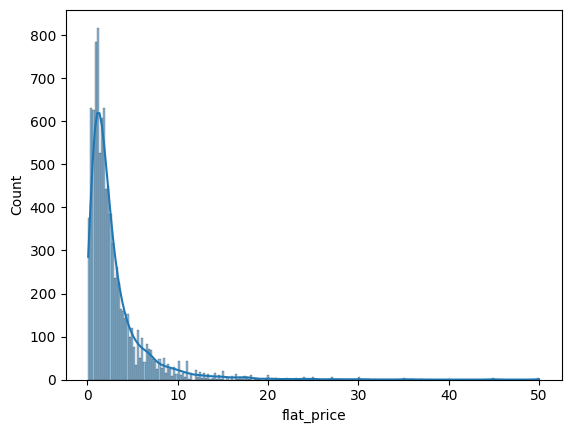

In [10]:
import seaborn as sns

sns.histplot(df['flat_price'],kde=True)